# Day 4 

## Using the optimizers with MLP 

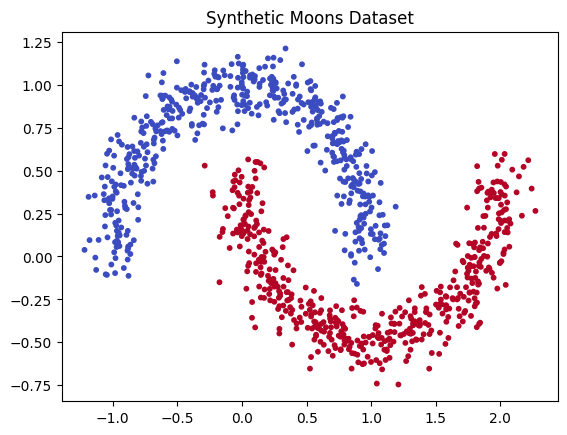

In [ ]:
from nets_numpy import NumpyMLP
from optimizers import AdamW, SGD, Momentum
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from dataloader import Dataloader

mlp = NumpyMLP(D=2, H=42, C=2, seed=42)
opt = AdamW(mlp.parameters(), lr=5e-3, weight_decay=1e-4)

# Generate synthetic data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)
fig, ax = plt.subplots()
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm', s=10)
ax.set_title("Synthetic Moons Dataset")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)



In [59]:
import numpy as np

loader = Dataloader(list(zip(X_train, y_train)))
num_epochs = 1000

for epoch in range(num_epochs): 
    loader.set_epoch(epoch)  # Shuffle data at the start of each epoch

    total_loss = 0.0
    n = 0
    for X_batch, y_batch in loader:
        mlp.zero_grad() # clear model buffers

        loss = mlp.backward(X_batch, y_batch, l2=0.0)  # Forward pass and compute loss

        # Backward pass
        opt.step()


        total_loss += loss * len(X_batch)
        n += len(X_batch)

    avg_loss = total_loss / n
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/1000, Loss: 0.3445
Epoch 2/1000, Loss: 0.2566
Epoch 3/1000, Loss: 0.2307
Epoch 4/1000, Loss: 0.2166
Epoch 5/1000, Loss: 0.2004
Epoch 6/1000, Loss: 0.1876
Epoch 7/1000, Loss: 0.1735
Epoch 8/1000, Loss: 0.1598
Epoch 9/1000, Loss: 0.1425
Epoch 10/1000, Loss: 0.1247
Epoch 11/1000, Loss: 0.1068
Epoch 12/1000, Loss: 0.0931
Epoch 13/1000, Loss: 0.0767
Epoch 14/1000, Loss: 0.0674
Epoch 15/1000, Loss: 0.0565
Epoch 16/1000, Loss: 0.0481
Epoch 17/1000, Loss: 0.0420
Epoch 18/1000, Loss: 0.0380
Epoch 19/1000, Loss: 0.0342
Epoch 20/1000, Loss: 0.0307
Epoch 21/1000, Loss: 0.0269
Epoch 22/1000, Loss: 0.0246
Epoch 23/1000, Loss: 0.0227
Epoch 24/1000, Loss: 0.0208
Epoch 25/1000, Loss: 0.0193
Epoch 26/1000, Loss: 0.0178
Epoch 27/1000, Loss: 0.0173
Epoch 28/1000, Loss: 0.0159
Epoch 29/1000, Loss: 0.0147
Epoch 30/1000, Loss: 0.0136
Epoch 31/1000, Loss: 0.0129
Epoch 32/1000, Loss: 0.0123
Epoch 33/1000, Loss: 0.0117
Epoch 34/1000, Loss: 0.0111
Epoch 35/1000, Loss: 0.0105
Epoch 36/1000, Loss: 0.0101
E

## Test

In [60]:
mlp.zero_grad()  # Reset gradients before evaluation
y_pred = mlp.forward(X_train)
accuracy = np.mean(np.argmax(y_pred, axis=1) == y_train)
print(f"Accuracy on train: {accuracy:.4f}")

Accuracy on train: 1.0000


In [61]:
mlp.zero_grad()  # Reset gradients before evaluation
y_pred = mlp.forward(X_test)
accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9800


## Decision boundary plot

I would like to plot the decision boundary at this point. 